In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
print(mnist.train.images.shape, mnist.validation.images.shape, mnist.test.images.shape)
print(mnist.train.labels.shape, mnist.validation.labels.shape, mnist.test.labels.shape)

(55000, 784) (5000, 784) (10000, 784)
(55000, 10) (5000, 10) (10000, 10)


In [4]:
# def TRAIN_SIZE(num):
#     print ('Total Training Images in Dataset = ' + str(mnist.train.images.shape))
#     print ('--------------------------------------------------')
#     x_train = mnist.train.images[:num,:]
#     print ('x_train Examples Loaded = ' + str(x_train.shape))
#     y_train = mnist.train.labels[:num,:]
#     print ('y_train Examples Loaded = ' + str(y_train.shape))
#     print('')
#     return x_train, y_train

# def TEST_SIZE(num):
#     print ('Total Test Examples in Dataset = ' + str(mnist.test.images.shape))
#     print ('--------------------------------------------------')
#     x_test = mnist.test.images[:num,:]
#     print ('x_test Examples Loaded = ' + str(x_test.shape))
#     y_test = mnist.test.labels[:num,:]
#     print ('y_test Examples Loaded = ' + str(y_test.shape))
#     return x_test, y_test

def display_digit(x_train, y_train, num):
    label = y_train[num].argmax(axis=0)
    image = x_train[num].reshape([28,28])
    plt.title('Example: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()


In [5]:
LEARNING_RATE = 1e-3
IS_LEARNING = True
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

l1 = tf.layers.dense(x, units=50,  activation=tf.nn.relu, name='l1')
l2 = tf.layers.dropout(inputs=l1, rate=0.2, training=IS_LEARNING, name='l2')
l3 = tf.layers.dense(l2, units=50,  activation=tf.nn.relu, name='l3')
l4 = tf.layers.dropout(inputs=l3, rate=0.2, training=IS_LEARNING, name='l4')
l5 = tf.layers.dense(l4, units=10, name='l5')

y = tf.nn.softmax(l5, name='y')

# loss = tf.losses.mean_squared_error(labels=y_, predictions=y)
# loss = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_, logits=y))

train_step = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)
# train_step = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(loss)

correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# sess = tf.Session()
# sess.run(tf.global_variables_initializer())

sess=tf.Session()
tf.global_variables_initializer().run(session=sess)




In [6]:

TRAIN_STEPS = 10000

for i in range(TRAIN_STEPS+1):
    batch = mnist.train.next_batch(100)
    _, loss_value = sess.run((train_step, loss), feed_dict={x: batch[0], y_: batch[1]})
    if i%1000 == 0:
        IS_LEARNING = False
        print('Training Step:' + str(i) + '  Accuracy =  ' + 
              str(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})) + 
              '  Loss =  ' + str(loss_value))
        IS_LEARNING = True
                        

Training Step:0  Accuracy =  0.1258  Loss =  2.302125
Training Step:1000  Accuracy =  0.9121  Loss =  1.5616546
Training Step:2000  Accuracy =  0.9263  Loss =  1.5002497
Training Step:3000  Accuracy =  0.9325  Loss =  1.5192053
Training Step:4000  Accuracy =  0.9401  Loss =  1.6008058
Training Step:5000  Accuracy =  0.9398  Loss =  1.520353
Training Step:6000  Accuracy =  0.9435  Loss =  1.5336838
Training Step:7000  Accuracy =  0.9448  Loss =  1.5479112
Training Step:8000  Accuracy =  0.9487  Loss =  1.5511177
Training Step:9000  Accuracy =  0.9498  Loss =  1.4999757
Training Step:10000  Accuracy =  0.9488  Loss =  1.4756835


In [27]:
IS_LEARNING = False

examples = mnist.test.next_batch(1000)
images = examples[0]
y_output = sess.run(y, feed_dict={x: examples[0], y_: examples[1]})

print(images.shape, y_output.shape)

y_info = np.hstack((images, y_output))

print(y_info.shape)

        
IS_LEARNING = True
                        
            
# with tf.variable_scope('y', reuse=True):
#     w = tf.get_variable('kernel')
#     w_val = sess.run(w)
#     print(w_val.shape)
#     plt.figure()
#     plt.imshow(w_val)
#     plt.axis('off')
#     plt.title('Last Layer Weights')    


(1000, 784) (1000, 10)
(1000, 794)


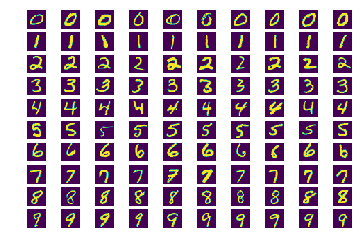

In [66]:
for i in range(10):
    y_info = y_info[y_info[:,784+i].argsort()][::-1]
    for j in range(10):    
        ax=plt.subplot2grid((10, 10), (i, j))
        ax.imshow(y_info[j][0:784].reshape(28,28))
        plt.axis('off')



In [15]:
import librosa
import numpy as np

s, sr=librosa.load("data/train_clean_male.wav", sr=None)
S=librosa.stft(s, n_fft=1024, hop_length=512)
sn, sr=librosa.load("data/train_dirty_male.wav", sr=None)
X=librosa.stft(sn, n_fft=1024, hop_length=512)
# print(S.shape)
# print(X.shape)
# print(S);
# print(np.abs(S));


In [105]:
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())

['/device:CPU:0']
